#  Case-study on real Time dataset using Artificial Neural Networks

We are going to do a case study on case study on real time dataset using Arificial Neural Network(ANN).
The dataset in which we going to do the ANN is from an European Bank in order to know how many customers have left the bank

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
#Import the dataset
data=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

The dataset contains 10000 rows and 14 columns. This means there are 10000 customers in the bank and the study is done on 14 paramerters which are splitted into 14 different columns.

1) RowNumber: Serial number of the dataset.

2) CustomerId: Id number given by the bank to customer.

3) Surname: Surname of the customer.

4) CreditScore: A credit score is a measure of an individual’s ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3 digit number that falls in the range of 300-900, 900 being the highest. You should always work towards reaching a credit score that is close to 900. 

5) Geography: Location of the customer.

6) Gender: Gender of the customer.

7) Age: Age of the customer.

8) Tenure: Time from which the customer is associated with the bank.

9) Balance: Amount maintained by the customer in the bank.

10) NumOfProducts: Number of products used by the customer from the bank.

11) HasCrCard: Using bank's credit card or not. If yes,1 no then 0.

12) IsActiveMember: Active customer in the bank or not. If yes,1 no then 0.

13) EstimatedSalary: Salary received by the customer at his/ her workplace.

14) Exited: Left the bank or not. If yes,1 no then 0.

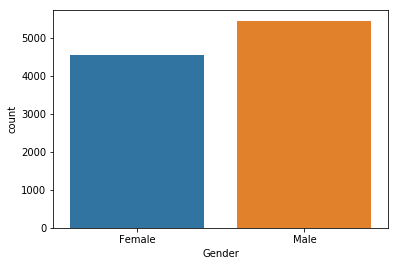

In [4]:
sb.countplot(data['Gender'])

The above countplot states that the bank has more male customers than female customers

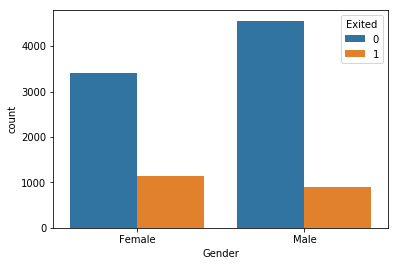

In [5]:
sb.countplot(x=data['Gender'],hue=data['Exited'])

The above countplot states that there are female customers who left the bank than the male customers

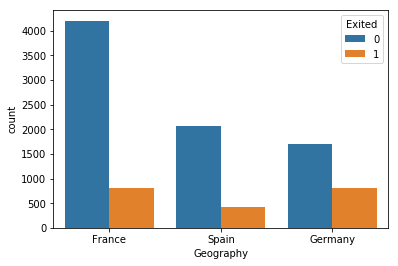

In [6]:
sb.countplot(x=data['Geography'],hue=data['Exited'])

The above countplot indicates that Germany had the lowest number of customers from the bank and highest amount of customers who left the bank were from Germany. 

In [7]:
x=data.iloc[:,3:13].values
y=data.iloc[:,13].values


In [8]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [9]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

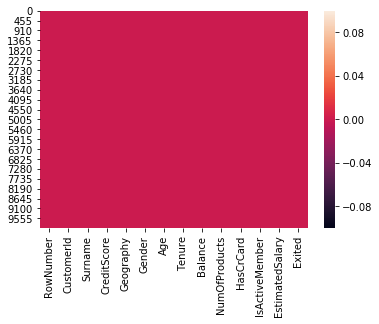

In [10]:
sb.heatmap(data.isnull())

The heatmap indicates that there are no null values in dataset

In [11]:
#Encoding catagorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x_1=LabelEncoder()
x[:,1]=labelencoder_x_1.fit_transform(x[:,1])
labelencoder_x_2=LabelEncoder()
x[:,2]=labelencoder_x_2.fit_transform(x[:,2])
x



array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

LabelEncoder,OneHotEncoder is used for converting characters into numbers

In [12]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
x_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [15]:
#import the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
#Initialising the ANN
classifier=Sequential()
#Adding the input and first hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Fitting the ANN to the training set
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 5s 592us/step - loss: 0.4900 - acc: 0.7955
Epoch 2/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.4354 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 169us/step - loss: 0.4330 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 169us/step - loss: 0.4301 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 181us/step - loss: 0.4262 - acc: 0.8024
Epoch 6/100
8000/8000 [==============================] - 2s 220us/step - loss: 0.4229 - acc: 0.8197
Epoch 7/100
8000/8000 [==============================] - 2s 223us/step - loss: 0.4204 - acc: 0.8244
Epoch 8/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.4176 - acc: 0.8302
Epoch 9/100
8000/8000 [==============================] - 1s 180us/step - loss: 0

In [17]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [18]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.843


In [19]:
y_pred


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#confusion matrix and classification report